<a href="https://colab.research.google.com/github/DevEnriquegd/ca-telecom-x-2/blob/main/ca_telecom_x_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Alura: Telecom X - Parte 2

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## 🛠️ Preparación de los Datos

### Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [81]:
import pandas as pd

url = 'https://raw.githubusercontent.com/DevEnriquegd/ca-telecom-x/refs/heads/main/data/telecom_x_data_lista.csv'

data = pd.read_csv(url)

In [82]:
data.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_daily',
       'charges_monthly', 'charges_total', 'charges_monthly_seg',
       'charges_total_seg', 'tenure_seg'],
      dtype='object')

In [107]:
data.sample(2)

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
3153,0,Male,0,0,0,26,0,No phone service,DSL,1,1,0,0,0,1,Month-to-month,1,Bank transfer (automatic),44.65,1156.55
4453,0,Female,0,0,0,44,0,No phone service,DSL,0,0,1,0,1,1,One year,1,Electronic check,49.05,2265.00


### Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.



In [84]:
columnas_irrelevantes = [
    'customer_id', 'charges_monthly_seg', 'charges_total_seg',
    'tenure_seg', 'charges_daily'
]

data = data.drop(columns=columnas_irrelevantes)

data.columns

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total'],
      dtype='object')

### Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

variables_categoricas = [
    'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
    'online_security', 'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'paperless_billing', 'senior_citizen',
    'internet_service', 'contract', 'payment_method'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), variables_categoricas)
    ],
    remainder='passthrough'
)

data_transformada = preprocessor.fit_transform(data)
columnas_finales = preprocessor.get_feature_names_out()

data_encoded = pd.DataFrame(
    data_transformada,
    columns=columnas_finales,
    index=data.index
)

print(f"✅ Encoding optimizado aplicado. Total columnas: {data_encoded.shape[1]}")

✅ Encoding optimizado aplicado. Total columnas: 31


In [103]:
data_encoded.sample(4)

,cat__gender_Male,cat__partner_1,cat__dependents_1,cat__phone_service_1,cat__multiple_lines_1,cat__multiple_lines_No phone service,cat__online_security_1,cat__online_security_No internet service,cat__online_backup_1,cat__online_backup_No internet service,...,cat__internet_service_No,cat__contract_One year,cat__contract_Two year,cat__payment_method_Credit card (automatic),cat__payment_method_Electronic check,cat__payment_method_Mailed check,remainder__churn,remainder__tenure,remainder__charges_monthly,remainder__charges_total
2433,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,24.70,467.15
4065,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.0,33.45,1500.25
2902,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,60.90,1785.65
5939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,69.60,69.60


### Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [104]:
distribucion = data['churn'].value_counts().to_frame()
distribucion.columns = ['Cantidad']
distribucion['Proporción'] =round( data['churn'].value_counts(normalize=True),2)

distribucion

,Cantidad,Proporción
churn,,
0,5174,0.73
1,1869,0.27


## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.




In [88]:
corr_matrix = data_encoded.corr()

corr_churn = (
    corr_matrix["remainder__churn"]
    .sort_values(ascending=False)
    .to_frame()
)

corr_churn

,remainder__churn
remainder__churn,1.000000
cat__internet_service_Fiber optic,0.308020
cat__payment_method_Electronic check,0.301919
remainder__charges_monthly,0.193356
cat__paperless_billing_1,0.191825
cat__senior_citizen_1,0.150889
cat__streaming_tv_1,0.063228
cat__streaming_movies_1,0.061382
cat__multiple_lines_1,0.040102
cat__phone_service_1,0.011942


### Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

* Tiempo de contrato × Cancelación

* Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

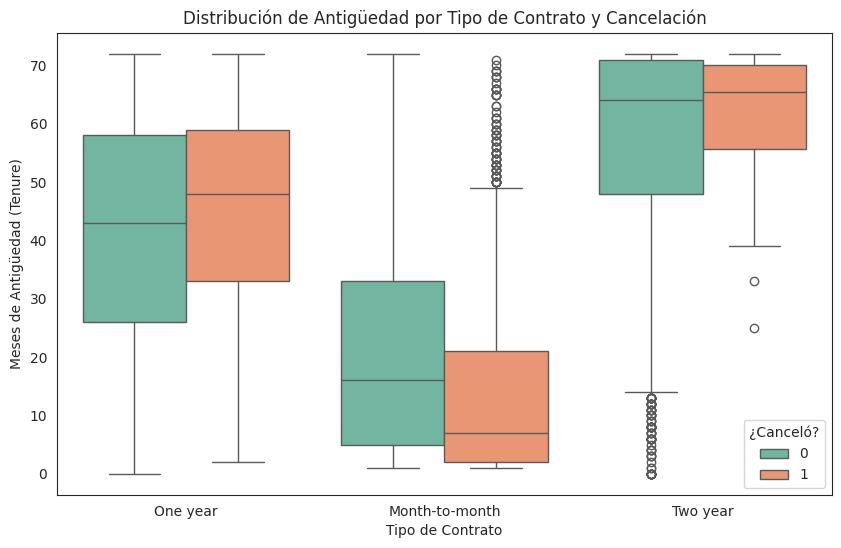

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='contract', y='tenure', hue='churn', data=data, palette='Set2')

plt.title('Distribución de Antigüedad por Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Meses de Antigüedad (Tenure)')
plt.legend(title='¿Canceló?')
plt.show()

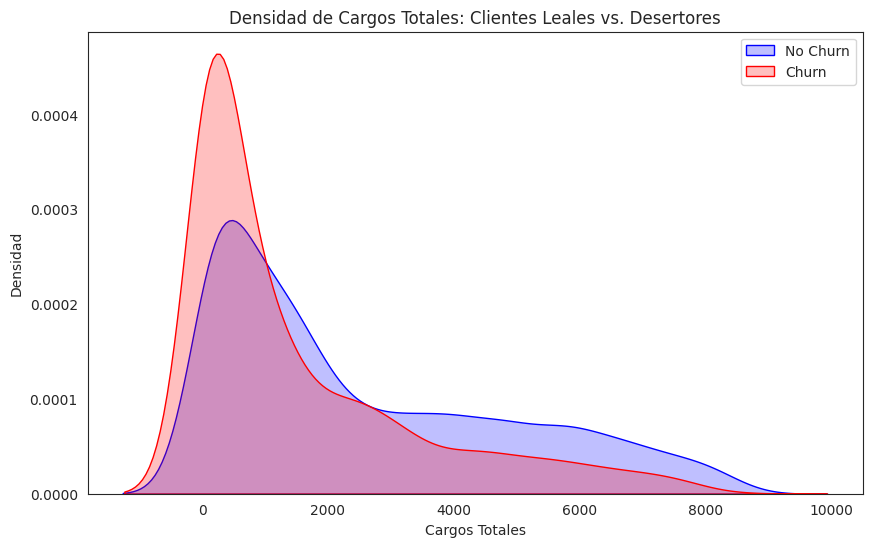

In [90]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['churn'] == 0], x='charges_total', fill=True, label='No Churn', color='blue')
sns.kdeplot(data=data[data['churn'] == 1], x='charges_total', fill=True, label='Churn', color='red')

plt.title('Densidad de Cargos Totales: Clientes Leales vs. Desertores')
plt.xlabel('Cargos Totales')
plt.ylabel('Densidad')
plt.legend()
plt.show()

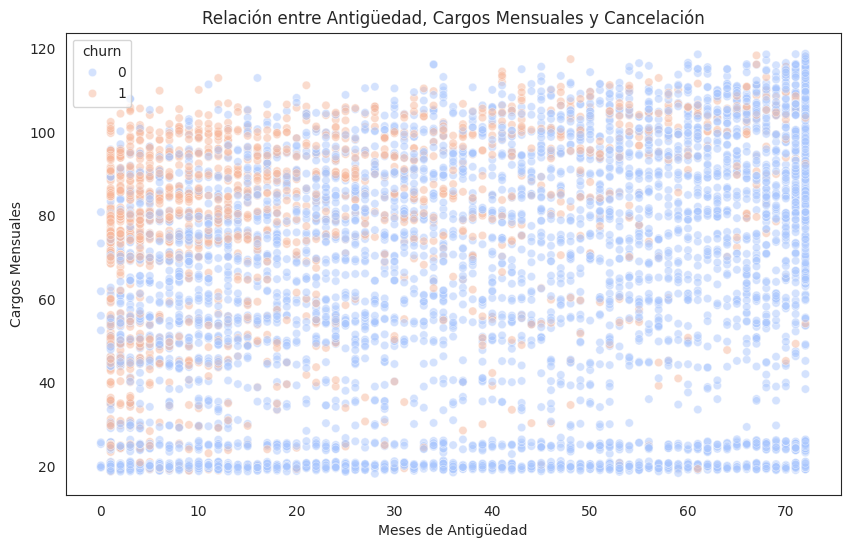

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='charges_monthly', hue='churn', data=data, alpha=0.5, palette='coolwarm')

plt.title('Relación entre Antigüedad, Cargos Mensuales y Cancelación')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cargos Mensuales')
plt.show()

## 🤖 Modelado Predictivo

### Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [108]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('remainder__churn', axis=1)
y = data_encoded['remainder__churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print(f"Proporción de Churn en Entrenamiento: {y_train.mean():.2%}")
print(f"Proporción de Churn en Prueba: {y_test.mean():.2%}")

Proporción de Churn en Entrenamiento: 26.53%
Proporción de Churn en Prueba: 26.55%


### Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

* Un modelo puede requerir normalización, como Regresión Logística o KNN.

* El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

* Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

* Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'subsample': np.linspace(0.6, 1.0, 10),
    'colsample_bytree': np.linspace(0.6, 1.0, 10)
}

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': array([0.6       , 0.64444444, 0.68888889, 0.73333333, 0.77777778,
       0.82222222, 0.86666667, 0.91111111, 0.95555556, 1.        ])},
                   random_state=42, scoring='recall')

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

modelo_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
modelo_knn.fit(X_train, y_train)

modelo_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf', random_state=42, probability=True))])
modelo_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(probability=True, random_state=42))])

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

modelo_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_tree.fit(X_train, y_train)

modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
modelo_rf.fit(X_train, y_train)

modelo_xgb = random_search.best_estimator_
modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7333333333333333), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.15000000000000002), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(5), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(100), n_jobs=None,
              num_parallel_tree=None, ...)

In [148]:
y_pred_knn = modelo_knn.predict(X_test)
y_pred_tree = modelo_tree.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_svm = modelo_svm.predict(X_test)
y_pred_xgb = modelo_xgb.predict(X_test)

In [149]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelos_cv = {
    "KNN": modelo_knn,
    "Árbol": modelo_tree,
    "RF": modelo_rf,
    "SVM": modelo_svm,
    "XGB": modelo_xgb
}

resultados_cv = []

for nombre, modelo in modelos_cv.items():
    scores = cross_val_score(
        modelo, X_train, y_train,
        cv=skf, scoring='recall', n_jobs=-1
    )

    resultados_cv.append({
        "Modelo": nombre,
        "Recall Promedio": round(scores.mean(),4),
        "Desviación Estándar (±)": round(scores.std(),4)
    })

df_cv_base = pd.DataFrame(resultados_cv).sort_values(by="Recall Promedio", ascending=False)

display(df_cv_base)

,Modelo,Recall Promedio,Desviación Estándar (±)
0,KNN,0.5382,0.0211
4,XGB,0.5214,0.0184
2,RF,0.5130,0.0110
3,SVM,0.5054,0.0270
1,Árbol,0.4595,0.0410


### Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

* Exactitud (Acurácia)
* Precisión
* Recall
* F1-score
* Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

* Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

* Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros

In [150]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    recall_score,
    precision_score
)

def evaluar_modelo_v2(modelo, X_test, y_test, nombre_modelo, min_precision=0.50):

    y_proba = modelo.predict_proba(X_test)[:, 1]

    thresholds = np.arange(0.01, 0.99, 0.01)
    best_recall, best_threshold = 0, 0.5

    for t in thresholds:
        y_pred_temp = (y_proba >= t).astype(int)
        rec = recall_score(y_test, y_pred_temp, zero_division=0)
        prec = precision_score(y_test, y_pred_temp, zero_division=0)

        if prec >= min_precision and rec > best_recall:
            best_recall, best_threshold = rec, t

    if best_recall == 0:
        for t in thresholds:
            y_pred_temp = (y_proba >= t).astype(int)
            rec = recall_score(y_test, y_pred_temp, zero_division=0)
            if rec > best_recall:
                best_recall, best_threshold = rec, t

    y_pred = (y_proba >= best_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    return {
        "Modelo": nombre_modelo,
        "TP": tp,
        "TN": tn,
        "FN": fn,
        "FP": fp,
        "Threshold": round(best_threshold, 2),
        "Recall": round(best_recall, 4),
        "Precision": round(precision_score(y_test, y_pred, zero_division=0), 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_proba), 4)
    }

In [151]:
resultados_lista = []

modelos_a_probar = [
    (modelo_knn, "KNN"),
    (modelo_tree, "DecisionTree"),
    (modelo_rf, "RandomForest"),
    (modelo_svm, "SVM"),
    (modelo_xgb, "XGBoost")
]

for mod, nombre in modelos_a_probar:
    res = evaluar_modelo_v2(mod, X_test, y_test, nombre)
    resultados_lista.append(res)

df_comparativo = pd.DataFrame(resultados_lista).sort_values(by="Recall", ascending=False)

display(df_comparativo)

,Modelo,TP,TN,FN,FP,Threshold,Recall,Precision,ROC-AUC
2,RandomForest,454,1101,107,451,0.47,0.8093,0.5017,0.8368
4,XGBoost,451,1105,110,447,0.47,0.8039,0.5022,0.8314
3,SVM,438,1116,123,436,0.47,0.7807,0.5011,0.8191
1,DecisionTree,431,1125,130,427,0.44,0.7683,0.5023,0.8160
0,KNN,332,1259,229,293,0.61,0.5918,0.5312,0.7838


### Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [154]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import copy

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

escenarios = [
    (X_train_over, y_train_over, "SMOTE"),
    (X_train_under, y_train_under, "Undersampling")
]

modelos_base = [
    (modelo_knn, "KNN"),
    (modelo_rf, "RandomForest"),
    (modelo_svm, "SVM"),
    (modelo_xgb, "XGBoost")
]

resultados_balanceo = []

for X_res, y_res, tecnica in escenarios:
    for mod, nombre in modelos_base:

        modelo_clon = copy.deepcopy(mod)

        modelo_clon.fit(X_res, y_res)

        res = evaluar_modelo_v2(
            modelo_clon,
            X_test,
            y_test,
            f"{nombre} + {tecnica}"
        )

        resultados_balanceo.append(res)

df_balanceo = pd.DataFrame(resultados_balanceo).sort_values(by="Recall", ascending=False)
display(df_balanceo)

,Modelo,TP,TN,FN,FP,Threshold,Recall,Precision,ROC-AUC
1,RandomForest + SMOTE,457,1098,104,454,0.31,0.8146,0.5016,0.8347
5,RandomForest + Undersampling,454,1101,107,451,0.47,0.8093,0.5017,0.8368
7,XGBoost + Undersampling,451,1105,110,447,0.47,0.8039,0.5022,0.8314
6,SVM + Undersampling,438,1116,123,436,0.47,0.7807,0.5011,0.8191
3,XGBoost + SMOTE,437,1123,124,429,0.26,0.7790,0.5046,0.8310
2,SVM + SMOTE,428,1126,133,426,0.28,0.7629,0.5012,0.8223
4,KNN + Undersampling,332,1259,229,293,0.61,0.5918,0.5312,0.7838
0,KNN + SMOTE,142,1430,419,122,0.81,0.2531,0.5379,0.7548


In [155]:
from imblearn.pipeline import Pipeline as ImbPipeline

def validar_modelos_balanceados(modelos, X, y, sampler, cv_splits=5):
    """
    Realiza validación cruzada aplicando balanceo correctamente dentro de cada fold.
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    resultados = []

    for nombre, modelo in modelos:
        pipeline = ImbPipeline([
            ('sampler', sampler),
            ('clf', modelo)
        ])

        cv_results = cross_validate(
            pipeline, X, y,
            cv=skf,
            scoring=['recall', 'precision', 'f1'],
            n_jobs=-1
        )

        resultados.append({
            "Modelo": nombre,
            "Recall Promedio": cv_results['test_recall'].mean(),
            "Recall STD": cv_results['test_recall'].std(),
            "Precision Promedio": cv_results['test_precision'].mean(),
            "F1 Promedio": cv_results['test_f1'].mean()
        })

    return pd.DataFrame(resultados).sort_values(by="Recall Promedio", ascending=False)

In [156]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

mis_modelos = [
    ("KNN", modelo_knn),
    ("Árbol", modelo_tree),
    ("RF", modelo_rf),
    ("SVM", modelo_svm),
    ("XGB", modelo_xgb)
]

print("Evaluando con SMOTE...")
df_smote = validar_modelos_balanceados(mis_modelos, X_train, y_train, sampler=SMOTE(random_state=42))
display(df_smote)

print("\nEvaluando con Undersampling...")
df_under = validar_modelos_balanceados(mis_modelos, X_train, y_train, sampler=RandomUnderSampler(random_state=42))
display(df_under)

Evaluando con SMOTE...


,Modelo,Recall Promedio,Recall STD,Precision Promedio,F1 Promedio
0,KNN,0.721719,0.026175,0.446246,0.551447
3,SVM,0.658238,0.025467,0.583743,0.618617
1,Árbol,0.643725,0.049065,0.524776,0.575902
2,RF,0.626130,0.023897,0.607604,0.616408
4,XGB,0.544336,0.019393,0.611845,0.575942



Evaluando con Undersampling...


,Modelo,Recall Promedio,Recall STD,Precision Promedio,F1 Promedio
2,RF,0.792788,0.019516,0.526629,0.632727
3,SVM,0.792039,0.007755,0.519717,0.627559
0,KNN,0.791273,0.015371,0.461774,0.583095
1,Árbol,0.762996,0.038673,0.495660,0.599732
4,XGB,0.756082,0.024225,0.511461,0.609924


## 📋 Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.
* KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.
* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.
* SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.
* Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).



In [157]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

modelo_rf.fit(X_resampled, y_resampled)

importancias = modelo_rf.feature_importances_
nombres_columnas = X.columns

feature_importance_df = pd.DataFrame({
    'feature': nombres_columnas,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

feature_importance_top = feature_importance_df.head(10)

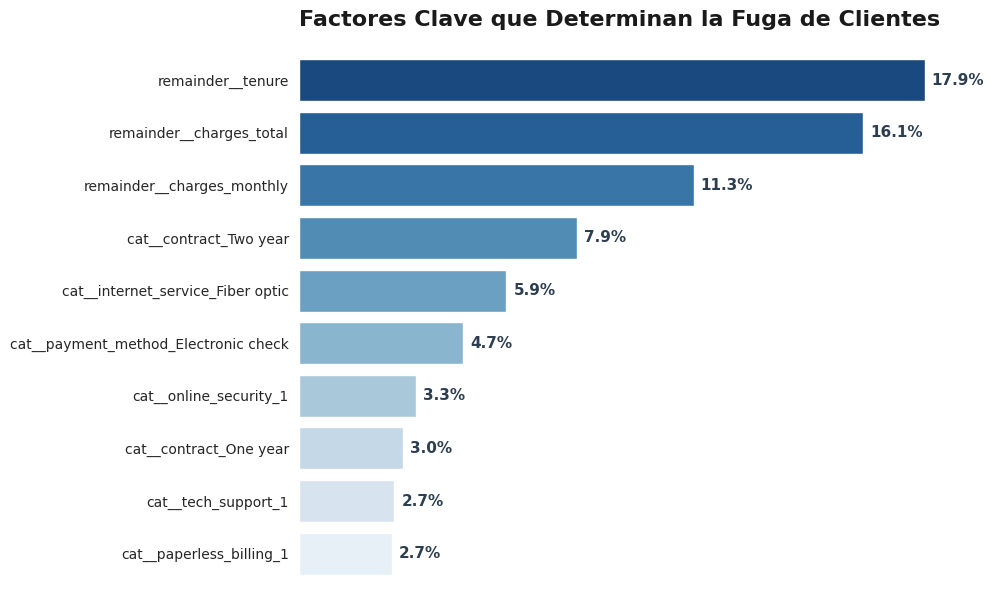

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), facecolor='white')

ax = sns.barplot(
    data=feature_importance_top,
    x="importance",
    y="feature",
    palette="Blues_r",
    hue="feature",
    legend=False
)

for i, v in enumerate(feature_importance_top["importance"]):
    ax.text(v + 0.002, i, f"{v:.1%}", va='center', fontsize=11, fontweight='bold', color='#2c3e50')

plt.title("Factores Clave que Determinan la Fuga de Clientes",
          fontsize=16, fontweight='bold', loc='left', pad=20, color='#1a1a1a')

sns.despine(left=True, bottom=True)
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [159]:
feature_importance_top

,feature,importance
27,remainder__tenure,0.178867
29,remainder__charges_total,0.161336
28,remainder__charges_monthly,0.112839
23,cat__contract_Two year,0.079412
20,cat__internet_service_Fiber optic,0.059376
25,cat__payment_method_Electronic check,0.047092
6,cat__online_security_1,0.033421
22,cat__contract_One year,0.029938
12,cat__tech_support_1,0.027338
18,cat__paperless_billing_1,0.026644


### Exportando el modelo

In [128]:
import pickle

filename = 'champion.pkl'

with open(filename, 'wb') as file:
    pickle.dump(modelo_rf, file)

print(f"¡Éxito! El modelo ha sido exportado como: {filename}")

¡Éxito! El modelo ha sido exportado como: champion.pkl


# Informe Estratégico: Predicción de Cancelación de Clientes (Churn) - Telecom X

## 1. Resumen del Problema de Negocio
Telecom X presenta una tasa de cancelación del **27%**. El análisis permitió identificar que el abandono no es aleatorio, sino que responde a patrones de comportamiento específicos:
* **Riesgo Crítico:** Clientes nuevos (bajo *tenure*), con contratos mensuales y tecnología de Fibra Óptica.
* **Fricción Financiera:** El método de pago *Electronic Check* actúa como un punto de decisión mensual que facilita la cancelación.
* **Factores de Retención:** Servicios de valor agregado (`Online Security`, `Tech Support`) y contratos a largo plazo (1-2 años).

## 2. Metodología y Robustez del Pipeline
Se diseñó un proceso de experimentación incremental para asegurar resultados fiables:
1.  **Tratamiento de Desbalance:** Se evaluaron técnicas de **Oversampling (SMOTE)** y **Undersampling**.
2.  **Validación Cruzada (Stratified K-Fold):** Tras una evaluación inicial, se aplicó validación cruzada para confirmar la consistencia de los modelos y evitar el sobreajuste.
3.  **Métrica de Éxito:** Se priorizó el **Recall** (Sensibilidad) para capturar la mayor cantidad de fugas reales.

## 3. Comparativa de Experimentos y Selección
### A. Evaluación Inicial de Balanceo
En la primera fase, observamos que tanto SMOTE como Undersampling ofrecían resultados competitivos, con una ligera ventaja en Recall para SMOTE en pruebas puntuales:

| Modelo | TP | TN | FN | FP | Recall | Precision | ROC-AUC |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **RandomForest + SMOTE** | 457 | 1098 | 104 | 454 | **81.46%** | 50.16% | 0.834 |
| **RandomForest + Under** | 454 | 1101 | 107 | 451 | **80.93%** | 50.17% | 0.836 |
| XGBoost + Under | 451 | 1105 | 110 | 447 | 80.39% | 50.22% | 0.831 |

### B. Validación Cruzada (La Prueba Definitiva)
Para desempatar y asegurar estabilidad, la validación cruzada confirmó que el **Undersampling** era la técnica más robusta para este dataset:

| Modelo (K-Folds) | Recall Promedio | Estabilidad (STD) | F1-Score | Estado |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest + Under** | **79.28%** | **0.019** | **0.63** | **GANADOR** |
| SVM + Under | 79.20% | 0.007 | 0.62 | Finalista |
| KNN + SMOTE | 72.17% | 0.026 | 0.55 | Descartado |

**Conclusión Técnica:** Aunque SMOTE mostró un Recall ligeramente superior en una sola prueba, la validación cruzada demostró que el **Random Forest con Undersampling** es más consistente para generalizar ante nuevos datos.



## 4. Factores Clave (Feature Importance)
El modelo final identifica los siguientes pesos en la decisión de fuga:
* **Factor Tiempo (tenure - 17.9%):** El predictor más sólido de lealtad.
* **Factor Económico (Charges Total/Monthly - 27.3%):** El peso financiero acumulado influye directamente en la permanencia.
* **Compromiso (Contract 2 Year - 7.9%):** Principal barrera contractual de salida.
* **Tecnología (Fiber Optic - 5.9%):** Punto de fricción que requiere revisión técnica.

## 5. Estrategias de Retención Recomendadas
1.  **Onboarding Proactivo:** Seguimiento intensivo en los primeros 6 meses (zona de máximo riesgo).
2.  **Incentivo de Pago Automático:** Promover la migración de *Electronic Check* a débito automático para reducir la fricción de pago.
3.  **Fidelización mediante Servicios:** Paquetizar `Tech Support` sin costo adicional en clientes de Fibra Óptica para aumentar el valor percibido.

## 6. Impacto y Sostenibilidad
El modelo "Champion" ha sido exportado como `champion.pkl`. Su implementación permitirá a Telecom X actuar preventivamente sobre el **80% de las cancelaciones potenciales**, optimizando el uso del presupuesto de marketing y retención.